In [ ]:
# Imports
import scipy.io
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn
from numpy import array
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.metrics import mean_squared_error

Στο dataset έχουμε 30 ασθενεις απο 2016 πενταλεπτα για τον καθενα με δειγματα απο τις μετρησεις των [sensor, injection, cho]. Χωρίζουμαι τους 30 ασθενείς σε 21 ασθενείς για το train set και 9 ασθενείς για το test set.

In [ ]:
# Read dataset from matlab file
#dataset = scipy.io.loadmat('/home/maria/Desktop/DatasetNorm.mat')
#print(dataset)
#dataset = dataset["Datasetnorm"]

#Dataset 7 adults 7 teenagers 7 children (train)
dataset = scipy.io.loadmat('/home/maria/Desktop/DatasetNormfinal3.mat')
#print(dataset)
dataset = dataset["Datasetnormfinal"]

dataset = np.swapaxes(dataset, 1, 2)
dataset = np.swapaxes(dataset, 0, 1)
#print(dataset)
print("dataset shape: ",dataset.shape)

# Train and test set
# Train set 70% and test set 30%
train = dataset[0:21]
test = dataset[21:30]
#train, test = train_test_split(dataset, test_size=0.3,random_state=10)
#print("train = ",train)
print("train set shape: ",train.shape)
#print("test= ",test)

print("test set shape: ",test.shape)


dataset shape:  (30, 2016, 3)
train set shape:  (21, 2016, 3)
test set shape:  (9, 2016, 3)


https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/?fbclid=IwAR05RRL4TveokIrkGwTGfKfKgUlzyq4RwbA7n5Yn9G_M4Qsl2BFGwbww9HY

In [ ]:
def split_sequence(sequence, n_steps, n_prediction):
    X = []
    y = []
    #print(sequence.shape)
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        end_iy = end_ix + n_prediction
        # check if we are beyond the sequence
        if (end_iy > len(sequence)-1) :
            break
        # gather input and output parts of the pattern
        #print("i=",i)
        #print("end_ix=", end_ix)
        #print(sequence[6][0],sequence[7][0],sequence[8][0])
        #print(sequence[i:(end_ix+3),0])
        #print(sequence[i:(end_ix+3)][:])
        #print(sequence[i:end_ix][:])
        #print(sequence[end_ix][0])
        #print(sequence[:][i:end_ix][:])
        seq_x, seq_y = sequence[i:end_ix][:], sequence[end_ix:end_iy,0]
        #print("seq_x=",seq_x.shape)
        #print("seq_y=",seq_y.shape)
        
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

Δημιουργούμε τα X_train/X_test και y_train/y_test. Στο y_train/y_test έχουμε την πρόβλεψη μας που είνα μόνο τα αποτελέσματα του sensor. Στο X_train/X_test έχουμε όλα τα δεδομένα από την βασή μας.

In [ ]:
# choose a number of time steps, 30 minbefore 
n_steps = 6
#n_prediction = 3   #15 min
#n_prediction = 6
#n_prediction = 12
n_prediction = 24
X_train = []
y_train = []
for i in range(0,21):
    raw_seq = train[i][:][:]
    # split into samples
    x, y = split_sequence(raw_seq, n_steps, n_prediction)
    #print("x",x)
    #print("y",y)
    X_train.append(x)
    y_train.append(y)
    # summarize the data

    #print("x",X_train)
    #print("y", y_train)

#print(np.shape(X_train))
X_train = np.vstack(X_train)
#print(X_train)
#print(newarray)
print(np.shape(X_train))
print(X_train.min())
#print(np.shape(y_train))

y_train = np.vstack(y_train)
#y_train = y_train.flatten(order = "C")
print(y_train)
print(y_train.min())
print(np.shape(y_train))

(41706, 6, 3)
0.0
[[0.24119241 0.23848238 0.23577236 ... 0.22764228 0.2195122  0.21409214]
 [0.23848238 0.23577236 0.23306233 ... 0.2195122  0.21409214 0.21138211]
 [0.23577236 0.23306233 0.22764228 ... 0.21409214 0.21138211 0.21138211]
 ...
 [0.27371274 0.26287263 0.25203252 ... 0.32520325 0.31165312 0.29539295]
 [0.26287263 0.25203252 0.24932249 ... 0.31165312 0.29539295 0.27913279]
 [0.25203252 0.24932249 0.26287263 ... 0.29539295 0.27913279 0.26287263]]
0.02168021680216802
(41706, 24)


In [ ]:
# choose a number of time steps, 30 min before 
n_steps = 6
#n_prediction = 3
#n_prediction = 6
#n_prediction = 12
n_prediction = 24
X_test = []
y_test = []
for i in range(0,9):
    raw_seq = test[i][:][:]
    # split into samples
    x, y = split_sequence(raw_seq, n_steps,n_prediction)
    X_test.append(x)
    y_test.append(y)

X_test = np.vstack(X_test)
#print(np.shape(X_test))

y_test = np.vstack(y_test)
scipy.stats.pearsonr
#print(y_test)
print(y_test.min())
#print(np.shape(y_test))

0.0027100271002710027


In [ ]:
# define model
n_features = 3
#print(n_features)
n_neurons = 50
model = Sequential()
model.add(LSTM(n_neurons, activation='relu', input_shape=(n_steps, n_features),return_sequences = False))
model.add(Dense(np.shape(y_test)[1], activation = 'relu'))
model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10800     
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1224      
Total params: 12,024
Trainable params: 12,024
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
#print(np.shape(X_train))
#print(np.shape(y_train))
#print(y_train)
model.fit(X_train, y_train, epochs=100, batch_size = 1)



Epoch 1/100
41706/41706 [==============================] - 77s 2ms/step - loss: 0.0182
Epoch 2/100
41706/41706 [==============================] - 77s 2ms/step - loss: 0.0053
Epoch 3/100
41706/41706 [==============================] - 74s 2ms/step - loss: 0.0051
Epoch 4/100
41706/41706 [==============================] - 73s 2ms/step - loss: 0.0051
Epoch 5/100
41706/41706 [==============================] - 72s 2ms/step - loss: 0.0050
Epoch 6/100
41706/41706 [==============================] - 73s 2ms/step - loss: 0.0050
Epoch 7/100
41706/41706 [==============================] - 70s 2ms/step - loss: 0.0050
Epoch 8/100
41706/41706 [==============================] - 78s 2ms/step - loss: 0.0050
Epoch 9/100
41706/41706 [==============================] - 76s 2ms/step - loss: 0.0049
Epoch 10/100
41706/41706 [==============================] - 76s 2ms/step - loss: 0.0049
Epoch 11/100
41706/41706 [==============================] - 74s 2ms/step - loss: 0.0049
Epoch 12/100
41706/41706 [===============

41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 95/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 96/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 97/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 98/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 99/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044
Epoch 100/100
41706/41706 [==============================] - 67s 2ms/step - loss: 0.0044


In [ ]:
# make predictions
#trainPredict = model.predict(X_train,verbose = 0)
#trainPredict = trainPredict.reshape(y_train.shape)
#print(trainPredict)
#print(max(trainPredict))
#print(trainPredict.shape)

testPredict = model.predict(X_test, verbose = 0)
print(testPredict)
#print(max(testPredict))
print(testPredict.shape)
#testPredict = testPredict.reshape(y_test.shape)
#print(testPredict.shape)
#print(testPredict)
#print(y_test)
print(y_test.shape)


[[0.1994636  0.19787976 0.19776745 ... 0.2545477  0.25823474 0.2619177 ]
 [0.19998339 0.19937056 0.1999079  ... 0.25395396 0.2574619  0.2610131 ]
 [0.19752678 0.19633664 0.19642064 ... 0.2478874  0.25148183 0.2551871 ]
 ...
 [0.3784495  0.37124586 0.36501    ... 0.3069291  0.30755624 0.3089683 ]
 [0.3753981  0.367802   0.36122397 ... 0.3059532  0.30682254 0.3084547 ]
 [0.38508075 0.38044727 0.37578133 ... 0.31635898 0.31673035 0.31785047]]
(17874, 24)
(17874, 24)


In [ ]:
import math
def rmse(y_actual,y_predicted,N):
    #y_predicted = y_predicted.flatten(order = "C")
    #y_actual = y_actual.flatten(order = "C")
    #print(sum((y_actual-y_predicted)**2))
    x = sum((y_actual-y_predicted)**2)/N
    #print(x)
    rmse = math.sqrt(x)
    return rmse

def mard(y_actual,y_predicted,N):
    
    #y_predicted = y_predicted.flatten(order = "C")
    #y_actual = y_actual.flatten(order = "C")
    #print(y_predicted.shape)
    #print(y_actual)
    #print(len(np.divide(abs(y_predicted-y_actual),y_actual)))
    temp = sum(np.divide(abs(y_predicted-y_actual),y_actual))
    #print(temp)
    mard_test = (temp/N)*100
    return mard_test

In [ ]:
print(y_test.shape)
step = int(y_test.shape[0]/9)
print(step)
y_actual = np.zeros((9,step,n_prediction))
y_predicted = np.zeros((9,step,n_prediction))
#print(y_actual.shape)
x=0
for i in range(0,9):
    y_actual[i] = y_test[x:x+step][:]
    y_predicted[i] = testPredict[x:x+step][:]
    x = x+step
#print(x)
print(y_actual[0].shape)
#print(y_predicted.shape)
#print(y_actual.flatten(order = "C").shape)
#print(y_predicted)

print("Result for PH =",n_prediction*5, "min")
# Calculate RMSE
total_rmse = 0
x = 0

print(step)
print(testPredict.shape)
num = y_test.shape[0]
while (x<num):
    w = y_test[x:x+step][:]
    z = testPredict[x:x+step][:]
    
    x=x+step
    flatten_actual = w.flatten(order = "C")
    #print(flatten_actual)
    #print("flatten actual",flatten_actual.shape)
    flatten_predicted = z.flatten(order="C")
    #print(flatten_predicted)
    #print("flatten predict",flatten_predicted.shape)
    rmse_test = rmse(flatten_actual,flatten_predicted,step*n_prediction)
    print("RMSE test για τον ασθενή",":",rmse_test)
    total_rmse = total_rmse + rmse_test
print("Total rmse",total_rmse/9)

print(y_actual[0].flatten(order = "C").shape)
# Calculate MARD
total_mard = 0
x=0
while (x<num):
    w = y_test[x:x+step][:]
    z = testPredict[x:x+step][:]
    
    x=x+step
    flatten_actual = w.flatten(order = "C")
    #print(flatten_actual)
    #print("flatten actual",flatten_actual.shape)
    flatten_predicted = z.flatten(order="C")
    #print(flatten_predicted)
    #print("flatten predict",flatten_predicted.shape)
     
    mard_test = mard(flatten_actual,flatten_predicted,step*n_prediction)
    print("MARD test για τον ασθενή",i+1,":",mard_test)
    total_mard = total_mard + mard_test
print("Total MARD",total_mard/9)

# Calculate CC

total_cc = 0
x=0
while (x<num):
    w = y_test[x:x+step][:]
    z = testPredict[x:x+step][:]
    
    x=x+step
    flatten_actual = w.flatten(order = "C")
    #print(flatten_actual)
    #print("flatten actual",flatten_actual.shape)
    flatten_predicted = z.flatten(order="C")

    cc_test, p_value = scipy.stats.pearsonr( flatten_actual, flatten_predicted)
    print("CC test για τον ασθενή",i+1,":",cc_test*100)
    total_cc=total_cc + cc_test
print("Total CC",(total_cc/9)*100)

(17874, 24)
1986
(1986, 24)
Result for PH = 120 min
1986
(17874, 24)
RMSE test για τον ασθενή : 0.06425066046506013
RMSE test για τον ασθενή : 0.05679515981612028
RMSE test για τον ασθενή : 0.06785382854023317
RMSE test για τον ασθενή : 0.054185939347208764
RMSE test για τον ασθενή : 0.053817995804287755
RMSE test για τον ασθενή : 0.058059063074799716
RMSE test για τον ασθενή : 0.09332072623373174
RMSE test για τον ασθενή : 0.07628906338248587
RMSE test για τον ασθενή : 0.061624599652446245
Total rmse 0.06513300403515264
(47664,)
MARD test για τον ασθενή 9 : 21.321672606090882
MARD test για τον ασθενή 9 : 15.545225152869463
MARD test για τον ασθενή 9 : 22.50860806802601
MARD test για τον ασθενή 9 : 12.806425384211481
MARD test για τον ασθενή 9 : 18.70166388267772
MARD test για τον ασθενή 9 : 20.453444336108923
MARD test για τον ασθενή 9 : 35.05610210773047
MARD test για τον ασθενή 9 : 21.29053859473824
MARD test για τον ασθενή 9 : 10.599694299835647
Total MARD 19.80926382580987
CC test

In [ ]:
# Calculate RMSE
print("Result for PH =",n_prediction*5, "min")
y_actual = y_test
print(y_actual.shape)
y_predicted = testPredict
y_predicted = y_predicted.flatten(order = "C")
y_actual = y_actual.flatten(order = "C")
print(y_actual)
print(y_predicted)
#rmse_test = mean_squared_error(y_actual, y_predicted,squared=True)
#print("RMSE test: ",rmse_test)
#print("y actual",y_actual, y_actual.shape)
#print("y predict",y_predicted, y_predicted.shape)
rmse_test = rmse(y_actual,y_predicted,y_actual.shape[0])
print("RMSE test: ",rmse_test)
#print(y_actual.flatten(order = "C").shape)

# Calculate MARD
#y_predicted = y_predicted.flatten(order = "C")
#y_actual = y_actual.flatten(order = "C")
#print(y_predicted.shape)
#print(y_actual.shape[0])
#temp = sum(np.divide(abs(y_predicted-y_actual),y_actual))
#mard_test = (temp/y_actual.shape[0])*100
#print("MARD test:", mard_test)
mard_test = mard(y_actual,y_predicted,y_actual.shape[0])
print("MARD test:", mard_test)

# Calculate CC

cc_test, p_value = scipy.stats.pearsonr(y_actual, y_predicted)
print("CC test:", cc_test*100)

Result for PH = 120 min
(17874, 24)
[0.20054201 0.19783198 0.19783198 ... 0.27371274 0.25745257 0.24119241]
[0.1994636  0.19787976 0.19776745 ... 0.31635898 0.31673035 0.31785047]
RMSE test:  0.06623837215831231
MARD test: 19.80926382580977
CC test: 80.02210116619403


17874
1986
[0.15176152 0.15447154 0.16260163 ... 0.19512195 0.20054201 0.20867209]
(1986,)
(1986,)


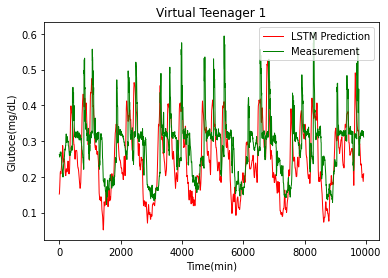

[0.2303523  0.23306233 0.23306233 ... 0.22493225 0.23306233 0.24119241]
(1986,)
(1986,)


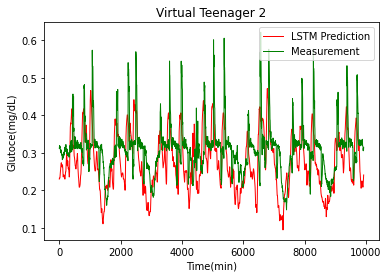

[0.24119241 0.23577236 0.2303523  ... 0.16802168 0.16531165 0.16260163]
(1986,)
(1986,)


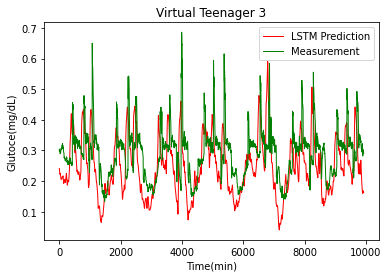

[0.28184282 0.28455285 0.28184282 ... 0.22493225 0.21409214 0.20596206]
(1986,)
(1986,)


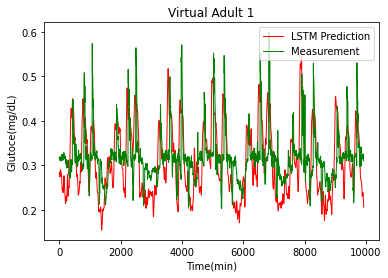

[0.21409214 0.20867209 0.20054201 ... 0.1598916  0.17073171 0.18157182]
(1986,)
(1986,)


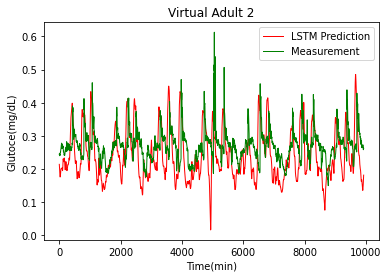

[0.21409214 0.2195122  0.22222222 ... 0.17344173 0.16260163 0.15447154]
(1986,)
(1986,)


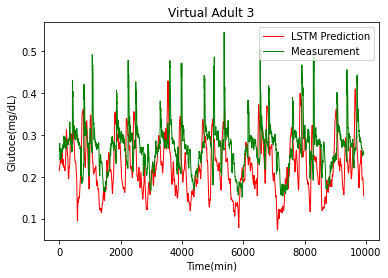

[0.22222222 0.2195122  0.21680217 ... 0.26558266 0.24661247 0.22764228]
(1986,)
(1986,)


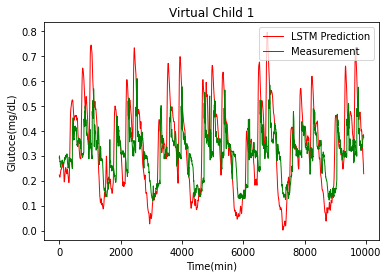

[0.20325203 0.19783198 0.19783198 ... 0.20867209 0.19783198 0.1897019 ]
(1986,)
(1986,)


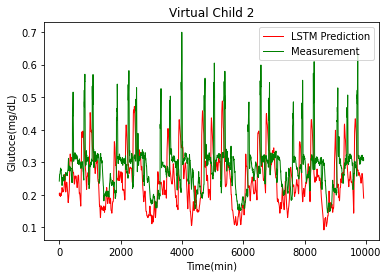

[0.26558266 0.26287263 0.26558266 ... 0.27371274 0.25745257 0.24119241]
(1986,)
(1986,)


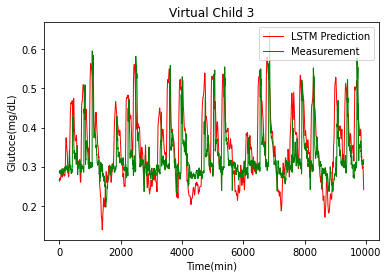

In [ ]:
import matplotlib.pyplot as plt 
x = np.linspace(0,step*5,step)

ten = 1
ad = 1
ch = 1
i = 0
c=0
print(y_test.shape[0])
print(step)
num = y_test.shape[0]
y_actual = np.zeros((9,step,n_prediction))
y_predicted = np.zeros((9,step,n_prediction))
while (c<num):
    y_actual[i] = y_test[c:c+step][:]
    y_predicted[i] = testPredict[c:c+step][:]
    i=i+1
    c=c+step


for i in range(0,9):
   
    y_actualflatten=y_actual[i,:,n_prediction-1]
    
    print(y_actualflatten)
    print(y_actualflatten.shape)
    y_actualflatten=y_actualflatten.flatten()
    
    y_predictedflatten=y_predicted[i,:,n_prediction-1]
    y_predictedflatten=y_predictedflatten.flatten()
    print(y_actualflatten.shape)
    plt.plot(x,y_actualflatten,label="LSTM Prediction",color='red',linewidth = 1)
    plt.plot(x,y_predictedflatten,label="Measurement",color='green',linewidth = 1)
    plt.xlabel('Time(min)') 
    plt.ylabel('Glutoce(mg/dL)') 


    plt.legend(loc= 'upper right')

    if i in range(0,3):
        plt.title('Virtual Teenager '+ str(ten)) 
        plt.savefig('virtual_teen' + str(ten) + '.png')
        ten = ten+1
    if i in range(3,6):
        plt.title('Virtual Adult '+ str(ad)) 
        plt.savefig('virtual_adult' + str(ad) + '.png')
        ad = ad + 1
    if i in range(6,9):
        plt.title('Virtual Child '+ str(ch)) 
        plt.savefig('virtual_child' + str(ch) + '.png')
        ch = ch + 1
    plt.show()